In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob
import os
os.chdir('/home/roman/Documents/HU/CISC600_ScientificComputing/Project/')

In [7]:
def load_results(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

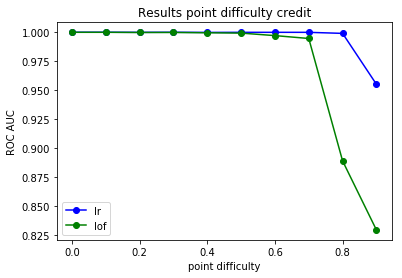

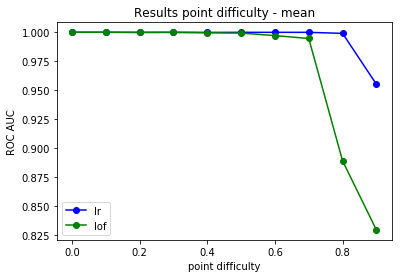

In [30]:
# Plot relative frequency
model_names = ['lr', 'lof']
results = []
for model in model_names:
    pkl_results = glob.glob('results/results_point_difficulty_{}*'.format(model))
    assert(len(pkl_results) == 1)
    results.append(load_results(pkl_results[0]))
y = dict()
for model_name in model_names:
    y[model_name] = []
for dataset in results[0].keys():
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'darkblue', 'black']\
        [:len(model_names)]
    x = np.array(list(results[0][dataset].keys()))
    for model_name, results, color in zip(model_names, results, colors):
        y_ = [i[2] for i in results[dataset].values()]
        y[model_name].append(y_)
        plt.plot(x, np.array(y_), color=color, marker='o')
    plt.title('Results point difficulty {}'.format(dataset))
    plt.xlabel('point difficulty')
    plt.ylabel('ROC AUC')
    plt.legend(model_names)
    plt.show()
for model_name, color in zip(model_names, colors):
    plt.plot(x, np.mean(np.array(y[model_name]), axis=0), color=color, marker='o')
plt.title('Results point difficulty - mean')
plt.xlabel('point difficulty')
plt.ylabel('ROC AUC')
plt.legend(model_names)
plt.show()